Random Seeding & Enable Determinism to produce replicable results

In [121]:
import tensorflow as tf
from tensorflow import keras

tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

Importing libraries and modules

In [122]:
import numpy as np
import pandas as pd
import openpyxl
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical

print(tf.__version__) 
# tf.random.set_seed(123)

from tensorboard.plugins.hparams import api as hp

2.15.0


In [123]:
features = ["Neck_flexion", "Neck_left-ward_tilt", "Neck_right-ward_rotation", "LeftElbow_flexion", "RightElbow_flexion", "LeftKnee_flexion", "RightKnee_flexion", "Thorax_extension", "Thorax_lateral_flexion_rotation"]

Load Dataset

In [124]:
filename = "mocap dataset.csv"
filepath = f"/home/RUS_CIP/st179677/project/dataset/5 users/{filename}"

df = pd.read_csv(filepath)
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)



df = df[features]
df

,Neck_flexion,Neck_left-ward_tilt,Neck_right-ward_rotation,LeftElbow_flexion,RightElbow_flexion,LeftKnee_flexion,RightKnee_flexion,Thorax_extension,Thorax_lateral_flexion_rotation
0,6.532609,3.413257,-9.364980,2.198468,6.993781,-20.284060,0.000000,3.393499,5.001980
1,6.557388,3.534179,-9.039681,1.893722,5.846905,-20.223180,-0.048457,3.442418,4.944012
2,6.557417,3.569129,-8.875886,1.806886,5.292946,-20.183570,0.000000,3.458419,4.921090
3,6.584455,3.591450,-8.561050,1.691654,4.553975,-20.087540,-0.068528,3.467804,4.882923
4,6.645496,3.591949,-8.246242,1.641156,3.538838,-19.995180,0.000000,3.469554,4.849421
...,...,...,...,...,...,...,...,...,...
50744,-16.670490,0.316716,-5.353024,15.269830,6.520080,0.000000,-17.106140,6.845329,-1.817957
50745,-14.910760,0.640351,-6.052200,14.761030,6.830098,-0.044235,-16.247700,6.842291,-1.589802
50746,-14.163410,0.802677,-6.308852,14.491450,6.867785,-0.044235,-15.807290,6.873380,-1.477548
50747,-12.880330,1.093821,-6.555832,13.773880,6.764049,0.000000,-14.789060,6.955138,-1.295967


In [125]:
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df),columns = df.columns, index=df.index)

df

# scaler = MinMaxScaler()
# # scaler = scaler.fit(df)

# df = scaler.fit_transform(df)
# df

,Neck_flexion,Neck_left-ward_tilt,Neck_right-ward_rotation,LeftElbow_flexion,RightElbow_flexion,LeftKnee_flexion,RightKnee_flexion,Thorax_extension,Thorax_lateral_flexion_rotation
0,1.141072,0.134815,-0.930625,-0.869576,-0.741033,0.087011,0.923320,0.531580,0.854031
1,1.142813,0.151861,-0.903030,-0.879006,-0.771593,0.089203,0.921460,0.533954,0.847211
2,1.142815,0.156788,-0.889135,-0.881694,-0.786354,0.090629,0.923320,0.534730,0.844514
3,1.144715,0.159935,-0.862426,-0.885260,-0.806045,0.094088,0.920689,0.535186,0.840023
4,1.149004,0.160005,-0.835721,-0.886822,-0.833095,0.097414,0.923320,0.535271,0.836081
...,...,...,...,...,...,...,...,...,...
50744,-0.489302,-0.301695,-0.590284,-0.465071,-0.753656,0.817460,0.266742,0.699089,0.051579
50745,-0.365654,-0.256073,-0.649596,-0.480816,-0.745395,0.815867,0.299691,0.698941,0.078425
50746,-0.313141,-0.233191,-0.671369,-0.489159,-0.744391,0.815867,0.316595,0.700450,0.091633
50747,-0.222985,-0.192149,-0.692320,-0.511365,-0.747155,0.817460,0.355678,0.704417,0.112998


Plotting Distribution of Classes

In [126]:
labels_filename = "labels.xlsx"
labels_filepath = f"/home/RUS_CIP/st179677/project/dataset/5 users/{labels_filename}"
labels_df = pd.read_excel(labels_filepath)
print(labels_df)


       labels
0           0
1           0
2           0
3           0
4           0
...       ...
50744       4
50745       4
50746       4
50747       4
50748       4

[50749 rows x 1 columns]


In [127]:
# Create 51 empty lists with names X0 to X50
X0, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, y = ([] for _ in range(12))
# X, y = [[] for _ in range(51)], []

# # Print the lists for verification
# for i, X_list in enumerate([X0, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28, X29, X30, X31, X32, X33, X34, X35, X36, X37, X38, X39, X40, X41, X42, X43, X44, X45, X46, X47, X48, X49, X50, y]):
#     print(f"{X_list=}")


Create Sequences from Dataset

In [128]:
timesteps = 100
step_size = 2  # Adjust this value as needed to control the overlap

# Iterate over the range of rows in df
for i in range(0, df.shape[0] - timesteps, step_size):
    for j in range(9):  # Loop for column indexing
        globals()[f'X{j}'].append(df.iloc[i:i + timesteps, j])


# Iterate over the range of rows in labels_df
for i in range(0, labels_df.shape[0] - timesteps, step_size):
     y.append(labels_df.iloc[i + timesteps, 0])


In [129]:
type(y)

list

In [130]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [131]:
X0, X1, X2, X3, X4, X5, X6, X7,X8, y = np.array(X0), np.array(X1),  np.array(X2),  np.array(X3),  np.array(X4),  np.array(X5),  np.array(X6),  np.array(X7), np.array(X8), np.array(y)

In [132]:
# X0.shape

In [133]:
X0.shape

(25325, 100)

In [134]:
X0

array([[ 1.1410717 ,  1.14281281,  1.14281484, ...,  1.35015862,
         1.34876406,  1.34471973],
       [ 1.14281484,  1.14471468,  1.14900374, ...,  1.34471973,
         1.34129289,  1.3383083 ],
       [ 1.14900374,  1.15166279,  1.15699144, ...,  1.3383083 ,
         1.33712433,  1.33564588],
       ...,
       [-1.89052293, -1.94507061, -1.96984335, ..., -0.83071382,
        -0.76265061, -0.62553556],
       [-1.96984335, -2.01627046, -2.06060367, ..., -0.62553556,
        -0.48930163, -0.36565362],
       [-2.06060367, -2.11846084, -2.14827934, ..., -0.36565362,
        -0.31314083, -0.2229848 ]])

In [135]:
X = np.stack([X0, X1, X2, X3, X4, X5, X6, X7, X8], axis=2)

In [136]:
X.shape

(25325, 100, 9)

In [137]:
y.shape

(25325,)

In [138]:
# convert labels to one hot encoded

encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

# encode integers to one hot encoded values
Y = to_categorical(encoded_Y)
print(Y)
print(Y.shape)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]
(25325, 5)


In [139]:
#splitting dataset into train, test and validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=2)

print("X train :",X_train.shape)
print("y train:", y_train.shape)
print("X test :", X_test.shape)
print("y test :" ,y_test.shape)
print("X val :" ,X_val.shape)
print("y val :" ,y_val.shape)

# print(X_train)
# print(X_test)
# print(y_train) 
# print(y_val)



X train : (18234, 100, 9)
y train: (18234, 5)
X test : (5065, 100, 9)
y test : (5065, 5)
X val : (2026, 100, 9)
y val : (2026, 5)


In [140]:
from tensorflow.keras.optimizers import Adam

def model_builder(hp):
    model = tf.keras.Sequential()

    hp_lstm_neurons = hp.Int('LSTM_layer', min_value=8, max_value=24, step=8)
    hp_dense_neurons_l1 = hp.Int('Dense_layer_1', min_value=10, max_value=20, step=5)
    hp_dense_neurons_l2 = hp.Int('Dense_layer_2', min_value=10, max_value=20, step=5)
    hp_dropout = hp.Choice('dropout', values=[0.0,0.1])
    hp_lr = hp.Choice('learning_rate', values=[1e-2,1e-3,1e-4])

    model.add(LSTM(hp_lstm_neurons, input_shape=(100,10), dropout=hp_dropout))
    model.add(Dense(hp_dense_neurons_l1, activation='relu'))
    model.add(Dense(hp_dense_neurons_l2, activation='relu'))
    model.add(Dense(5, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=hp_lr),loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [141]:
# import keras_tuner as kt

# tuner = kt.GridSearch(model_builder,
#                      objective='val_accuracy',
#                      seed=1,
#                      max_retries_per_trial=3,
#                      max_consecutive_failed_trials=5)
                     

In [142]:
# from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)

In [143]:
# tuner.search(X_train, y_train, epochs=100, validation_data=(X_val, y_val) , callbacks=[early_stopping])

In [144]:
# best_hps = tuner.get_best_hyperparameters()[0]
# print(best_hps.values)

In [145]:
# model = tuner.hypermodel.build(best_hps)
# history = model.fit(X_train, y_train, epochs=100, validation_data=[X_val, y_val],callbacks=[early_stopping])

In [146]:
#LSTM Model

model = Sequential()
model.add(LSTM(16, input_shape=(100,9)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 16)                1664      
                                                                 
 dense_6 (Dense)             (None, 10)                170       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 5)                 55        
                                                                 
Total params: 1999 (7.81 KB)
Trainable params: 1999 (7.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


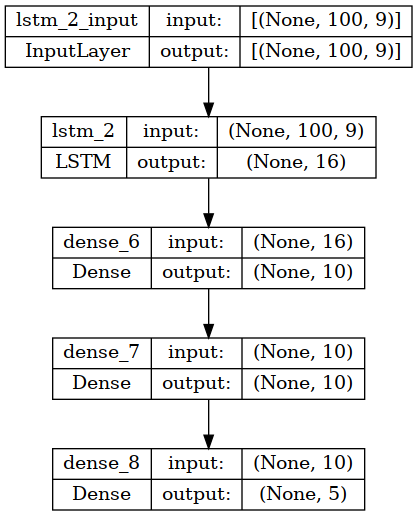

In [147]:
from keras.utils import plot_model
plot_model(model,show_shapes= True, show_layer_names= True, to_file='/home/RUS_CIP/st179677/project/LSTM.png')

In [148]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
filepath_1 = '/home/RUS_CIP/st179677/project/model/models/best_model.h5'
checkpoint = ModelCheckpoint(filepath=filepath_1, 
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)

callbacks_list = [early_stopping] # tf.keras.callbacks.TensorBoard(logdir), hp.KerasCallback(logdir, hparams)]

In [149]:
#LSTM model
from keras.optimizers import Adam

adam = Adam(learning_rate=0.001)
# chk = ModelCheckpoint('best_model.pkl', monitor='val_acc', save_best_only=True, mode='max', verbose=1)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history=model.fit(X_train, y_train ,validation_data=([X_val], y_val), epochs=150, callbacks=callbacks_list, batch_size=48)

Epoch 1/150


380/380 [==============================] - 2s 4ms/step - loss: 0.8167 - accuracy: 0.7263 - val_loss: 0.3699 - val_accuracy: 0.8929
Epoch 2/150
380/380 [==============================] - 1s 4ms/step - loss: 0.2634 - accuracy: 0.9209 - val_loss: 0.2146 - val_accuracy: 0.9329
Epoch 3/150
380/380 [==============================] - 1s 4ms/step - loss: 0.1686 - accuracy: 0.9489 - val_loss: 0.1618 - val_accuracy: 0.9467
Epoch 4/150
380/380 [==============================] - 1s 4ms/step - loss: 0.1346 - accuracy: 0.9565 - val_loss: 0.1437 - val_accuracy: 0.9501
Epoch 5/150
380/380 [==============================] - 1s 4ms/step - loss: 0.1150 - accuracy: 0.9625 - val_loss: 0.1076 - val_accuracy: 0.9650
Epoch 6/150
380/380 [==============================] - 1s 4ms/step - loss: 0.0967 - accuracy: 0.9684 - val_loss: 0.1041 - val_accuracy: 0.9620
Epoch 7/150
380/380 [==============================] - 1s 4ms/step - loss: 0.0845 - accuracy: 0.9724 - val_loss: 0.0983 - val_accuracy: 0.9650
Epoch 8/150

In [150]:
# # Load the TensorBoard notebook extension
# %load_ext tensorboard

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


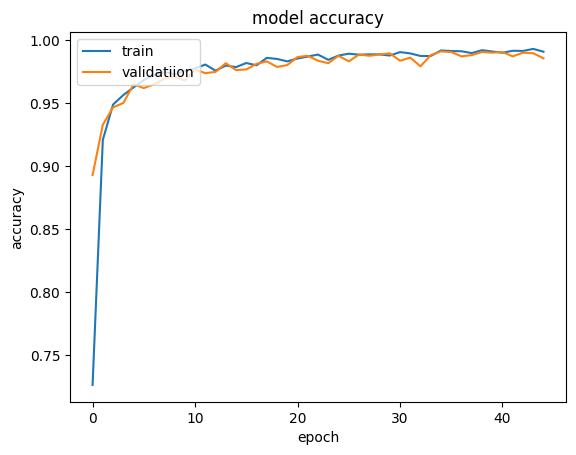

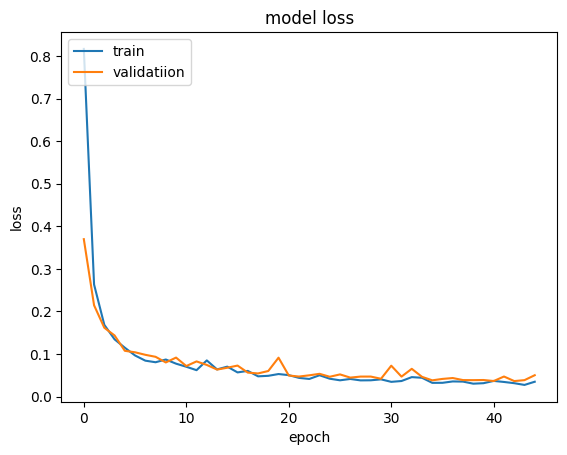

In [151]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validatiion'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validatiion'], loc='upper left')
plt.show()

In [152]:
#predicting on test datset
from keras.models import load_model
from sklearn.metrics import accuracy_score

# model = load_model(model_filepath)
classify_x=model.predict(X_test) 
# print(classify_x)
classes_x=np.argmax(classify_x,axis=1)
y_test= np.argmax(y_test,axis=1)
print(classes_x)
accuracy=accuracy_score(y_test, classes_x)
accuracy

159/159 [==============================] - 0s 1ms/step
[0 0 0 ... 0 0 0]


0.9153010858835143

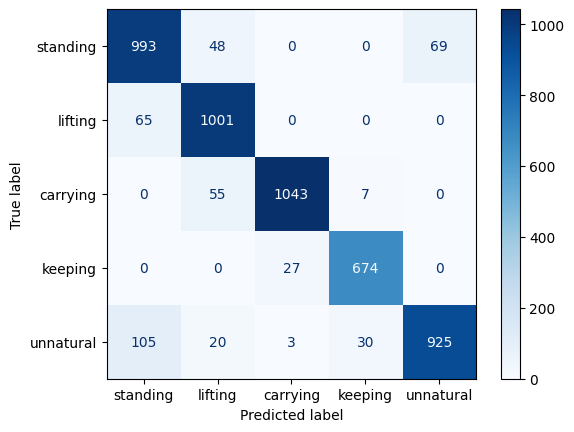

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1110
           1       0.89      0.94      0.91      1066
           2       0.97      0.94      0.96      1105
           3       0.95      0.96      0.95       701
           4       0.93      0.85      0.89      1083

    accuracy                           0.92      5065
   macro avg       0.92      0.92      0.92      5065
weighted avg       0.92      0.92      0.92      5065



In [153]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

labels = ["standing", "lifting", "carrying", "keeping", "unnatural"]

cm = confusion_matrix(y_test, classes_x)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test, classes_x))

In [154]:
# model_name = f"{round(accuracy*100,2)}_lstm_model_60FPS.h5"
# model_filepath=f'/home/RUS_CIP/st179677/project/model/{model_name}'

# model.save(model_filepath)

/home/RUS_CIP/st179677/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [155]:
# test2 = pd.read_csv('/home/RUS_CIP/st179677/project/dataset/standing_values_100_FPS.csv')
# test2


In [156]:
# labels2 = test2['labels']

In [157]:
# features2 = ["NeckFlEx", "HeadSideTilt", "NeckTors", "AngleElbowLeft", "ElbowRight", "AngleLegLeft", "LegRight","AngleShoulderAbAdLeft", "ShoulderAbAdRight", "AngleTorsoTilt", "AngleTorsoSideTilt"]

In [158]:
# test2 = test2[features2]
# test2

In [159]:
# ss = StandardScaler()
# test2 = pd.DataFrame(ss.fit_transform(test2),columns = test2.columns, index=test2.index)

# test2


In [160]:
# # Create 51 empty lists with names X0 to X50
# X0, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, y = ([] for _ in range(12))

In [161]:
# timesteps = 300

# # Iterate over the range of rows in df
# for i in range(0, df.shape[0] - timesteps):
#     for j in range(11):  # Loop for column indexing
#         globals()[f'X{j}'].append(df.iloc[i:i + timesteps, j])

# # Iterate over the range of rows in labels_df
# for i in range(0, labels_df.shape[0] - timesteps):
#      y.append(labels_df.iloc[i + timesteps, 0])
